In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
data = pd.read_csv("C:\\Users\\Shreya Sharma\\Downloads\\coronaCases.csv",sep =',')


In [3]:
data = data[['id','cases']]
print('-'*30);print('HEAD');print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   id  cases
0   1     27
1   2     27
2   3     27
3   4     44
4   5     44


------------------------------
PREPARE DATA
------------------------------


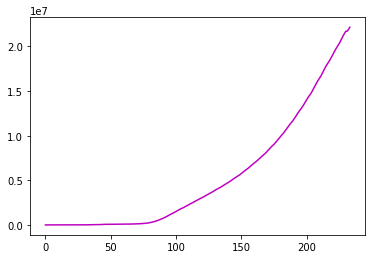

In [4]:
print('-'*30);print('PREPARE DATA');print('-'*30)
x = np.array(data['id']).reshape(-1, 1)
y = np.array(data['cases']).reshape(-1, 1)
plt.plot(y,'-m')
#plt.show()
polyFeat = PolynomialFeatures(degree=3)
x = polyFeat.fit_transform(x)
#print(x)

In [5]:
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)

------------------------------
TRAINING DATA
------------------------------
Accuracy:99.918 %


In [6]:
days = 15
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {days} days:',end='')
print(round(int(model.predict(polyFeat.fit_transform([[234+days]])))/1000000,2),'Million')

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 15 days:27.21 Million


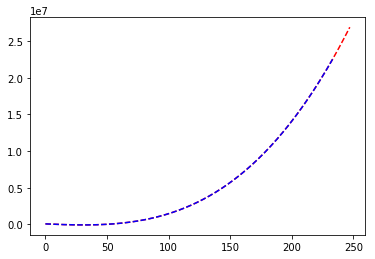

In [7]:
x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.show()